# Aula 07 - Exercício 06
## KNN e Métricas de avaliação
### Alunos:
 - Alexandre Batistella Bellas, 9763168
 - Moisés Botarro Ferraz Silva, 8504135


O dataset ["Breast Cancer Wisconsin"](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original) é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

- Notas:

  - **O dataset possui valores ausentes, representados por "?"**
  - A primeira variável do dataset é o ID de cada paciente. Essa variável **NÃO** deve ser utilizada no classificador 

---

- Carregue o dataset a partir do arquivo fornecido, substituindo os valores ausentes pela média dos valores daquela coluna. Utilize as classes `sklearn.impute.SimpleImputer` e a biblioteca `pandas`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('breast-cancer-wisconsin.data')
print("====== Exemplo de dado faltante ======")
print("----- Lendo arquivo bruto -----")
print(df.iloc[23])

# Queremos que, ao ler arquivo, ? seja substituído por NaN
df = pd.read_csv('breast-cancer-wisconsin.data', na_values='?')
print("----- Utilizando na_values -----")
print(df.iloc[23])

df.head(30)

====== Exemplo de dado faltante ======
----- Lendo arquivo bruto -----
id                 1057013
clump_thickness          8
u_cell_size              4
u_cell_shape             5
marg_adhesion            1
epi_cell_size            2
bare_nuclei              ?
bland_chrom              7
norm_nucl                3
mitoses                  1
class                    4
Name: 23, dtype: object
----- Utilizando na_values -----
id                 1057013.0
clump_thickness          8.0
u_cell_size              4.0
u_cell_shape             5.0
marg_adhesion            1.0
epi_cell_size            2.0
bare_nuclei              NaN
bland_chrom              7.0
norm_nucl                3.0
mitoses                  1.0
class                    4.0
Name: 23, dtype: float64


,id,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [2]:
# Vamos utilizar o SimpleImputer para substituir os valores faltantes pela média de cada uma das colunas

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imp_mean.fit_transform(df)

print('Nova linha 23: %s\n' % data[23])

# Verificando se valor faltante foi substituído pela média da coluna
print('Média da Coluna onde há dados faltantes: %.8f' % np.mean(df['bare_nuclei']))

Nova linha 23: [1.05701300e+06 8.00000000e+00 4.00000000e+00 5.00000000e+00
 1.00000000e+00 2.00000000e+00 3.54465593e+00 7.00000000e+00
 3.00000000e+00 1.00000000e+00 4.00000000e+00]

Média da Coluna onde há dados faltantes: 3.54465593




---
- Centralize e normalize os dados e separe 80% do conjunto para treino e 20% para testes. Faça uma divisão dos dados de maneira **estratificada**.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Para vetor x, retiramos coluna referente aos IDs e à classe
x = data[:,1:-1]
y = df[df.columns[-1]]

# Normalização
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

print("Verificação se os dados de todas as colunas possuem média 0 e variância 1")
for col in range(0, len(x_norm[0])):
    print("coluna %s: " % col, end='')
    print("média: %.2f" % np.mean(x_norm[:,col]), end='')
    print("\tstd: %2.f" % np.std(x_norm[:,col]))

Verificação se os dados de todas as colunas possuem média 0 e variância 1
coluna 0: média: -0.00	std:  1
coluna 1: média: -0.00	std:  1
coluna 2: média: -0.00	std:  1
coluna 3: média: 0.00	std:  1
coluna 4: média: 0.00	std:  1
coluna 5: média: 0.00	std:  1
coluna 6: média: 0.00	std:  1
coluna 7: média: -0.00	std:  1
coluna 8: média: -0.00	std:  1


In [4]:
import random
random.seed(10) # Para garantir consistência entre diferentes runs

# Separaçao dos dados em conjunto de treinamento e teste
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=test_size, stratify=y)

---

- Faça classificação no conjunto de testes utilizando 4 classificadores KNN, com K=3 e 15 e p=1 e 2 (distância de Minkowski/Euclidiana). Para cada classificador, calcule e exiba a matriz de confusão bem como a acurácia do classificador. **Para calcular a acurácia, utilize APENAS a matriz de confusão.**

In [5]:
# Rotina para imprimir matriz de confusão como um gráfico

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    
    title = 'Confusion Matrix'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Predicted label',
           xlabel='True label')

    # Rotate the tick labels and set their alignment.
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

np.set_printoptions(precision=2)

============ KNN para k = 3 e p = 1 ============
Confusion Matrix (True Classes: columns, Predicted Classes: rows)
[[89  3]
 [ 2 46]]


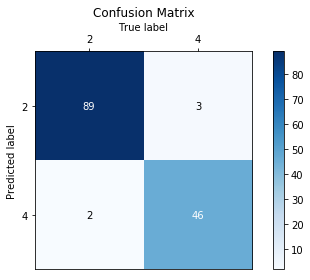

acurácia: 96.43% 

============ KNN para k = 3 e p = 2 ============
Confusion Matrix (True Classes: columns, Predicted Classes: rows)
[[89  3]
 [ 4 44]]


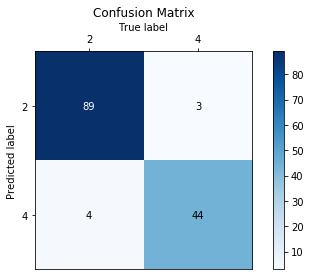

acurácia: 95.00% 

============ KNN para k = 15 e p = 1 ============
Confusion Matrix (True Classes: columns, Predicted Classes: rows)
[[90  2]
 [ 3 45]]


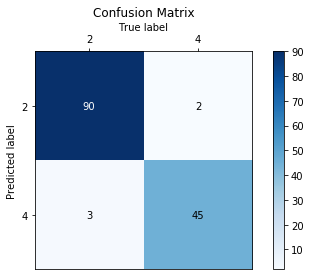

acurácia: 96.43% 

============ KNN para k = 15 e p = 2 ============
Confusion Matrix (True Classes: columns, Predicted Classes: rows)
[[90  2]
 [ 1 47]]


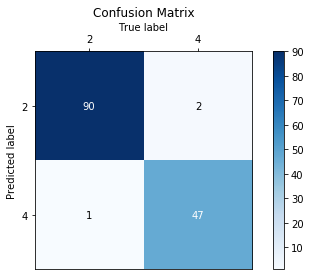

acurácia: 97.86% 



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def knn_classifier(k, p):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    print("============ KNN para k = %s e p = %s ============" % (k, p))
    cm = confusion_matrix(y_test, y_pred, labels=[2,4])
    print("Confusion Matrix (True Classes: columns, Predicted Classes: rows)")
    plot_confusion_matrix(cm , classes=[2,4])
    print(cm)
    plt.show()
    acc = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1] )
    print("acurácia: %.2f%% \n" % (acc*100))
    
    
knn_classifier(k=3, p=1)
knn_classifier(k=3, p=2)
knn_classifier(k=15, p=1)
knn_classifier(k=15, p=2)



---
Agora vamos analisar um problema de classificação não binário. Para isso, vamos utilizar o conjunto Iris. Repetindo os passos anteriores:
- Carregue o conjunto Iris
- Centralize e normalize os dados
- Separe o conjunto, de maneira **NÃO** estratificada, em 50% treino e 50% teste (a ideia é que o classificador tenha um erro maior)
- Utilize um classificador KNN com K=1 para predizer o conjunto de teste. Essa predição será utilizado posteriormente.


In [8]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True) #return_X_y: já retorna dados separados

# Normalização
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

print("Verificação se os dados de todas as colunas possuem média 0 e variância 1")
for col in range(0, len(x_norm[0])):
    print("coluna %s: " % col, end='')
    print("média: %.2f" % np.mean(x_norm[:,col]), end='')
    print("\tstd: %2.f" % np.std(x_norm[:,col]))

Verificação se os dados de todas as colunas possuem média 0 e variância 1
coluna 0: média: -0.00	std:  1
coluna 1: média: -0.00	std:  1
coluna 2: média: -0.00	std:  1
coluna 3: média: -0.00	std:  1


In [9]:
# Separação em conjunto de treinamento e teste
test_size = 0.5
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=test_size, stratify=None)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

---

- Mostre a matriz de confusão do conjunto de teste e em seguida, para cada variável do conjunto, mostre sua matriz de confusão binária.
  - Dica: Pesquise sobre o método `numpy.delete`

====== KNN para k = 1 e p = 2 ======
Confusion Matrix (True Classes: columns, Predicted Classes: rows)
[[22  1  0]
 [ 0 26  7]
 [ 0  1 18]]


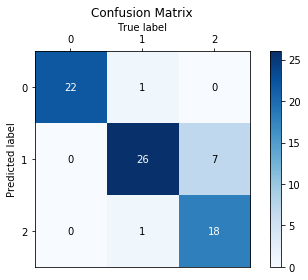

In [11]:
print("====== KNN para k = %s e p = %s ======" % (1, 2))
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
print("Confusion Matrix (True Classes: columns, Predicted Classes: rows)")
print(cm)

plot_confusion_matrix(cm , classes=[0,1,2])

=== Matriz de Confusão para a classe 0 ===
(True Classes: columns, Predicted Classes: rows)
[[22  1]
 [ 0 52]]



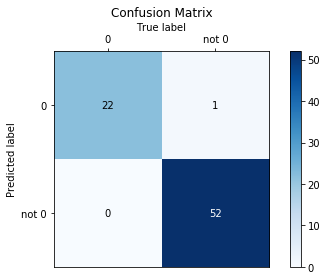

=== Matriz de Confusão para a classe 1 ===
(True Classes: columns, Predicted Classes: rows)
[[26  7]
 [ 2 40]]



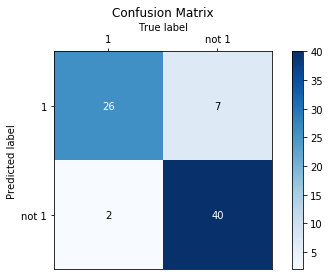

=== Matriz de Confusão para a classe 2 ===
(True Classes: columns, Predicted Classes: rows)
[[18  1]
 [ 7 49]]



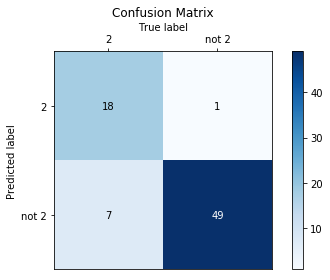

In [12]:
def binary_confusion_matrix(cm, chose_class, size):
    bin_cm = np.zeros((2,2), dtype=int)

    # Verdadeiros Positivos
    bin_cm[0,0] = cm[chose_class, chose_class] 

    # Verdadeiros Negativos
    tmp = np.delete(cm, chose_class, 0)
    tmp = np.delete(tmp, chose_class, 1)
    bin_cm[1,1] = np.sum(tmp)

    # Falsos Negativo
    for c in range(0,size):
        if c != chose_class:
            bin_cm[1,0] += cm[c, chose_class]

    # Falso Positivo
    for c in range(0,size):
        if c != chose_class:
            bin_cm[0,1] += cm[chose_class,c]

    return bin_cm

cms = []
n_classes = np.shape(cm)[0]
for label in range(0,n_classes):
    print('=== Matriz de Confusão para a classe %d ===' % label)
    print('(True Classes: columns, Predicted Classes: rows)')
    bin_cm = binary_confusion_matrix(cm, label, n_classes)
    print(bin_cm, end='\n\n')
    plot_confusion_matrix(bin_cm, classes=[label, ('not %s' % str(label))])
    plt.show()
    cms.append(bin_cm)



---

- Utilizando as matrizes de confusão binárias calculadas acima, calcule o **Recall** e **Precisão** de cada variável do conjunto.
  - Dica 1: Lembre-se que ao calcular a matriz de confusão binária para cada classe, obtemos os valores VP, FP, FN e VN.
  - Dica 2: Lembre-se que Recall é calculado por $\frac{VP}{VP+FN}$ e Precisão por  $\frac{VP}{VP+FP}$.

In [14]:
for label in range(0,n_classes):
    cm = cms[label]
    recall = cm[0,0] / (cm[0,0] + cm[1,0])
    precision = cm[0,0] / (cm[0,0] + cm[0,1])
    print("=== Classe %s ===" % label)
    print("recall: %.2f%%" % (recall*100))
    print("precisão: %.2f%%"% (precision*100), end='\n\n')

=== Classe 0 ===
recall: 100.00%
precisão: 95.65%

=== Classe 1 ===
recall: 92.86%
precisão: 78.79%

=== Classe 2 ===
recall: 72.00%
precisão: 94.74%





---
Considere o conjunto de dados abaixo, onde são representados um conjunto de $n$ pontos que podem ser classificados em duas classes: verde ou azul. **Todo** o conjunto pode ser visto na imagem abaixo. O ponto preto $q$ é um ponto de consulta, cuja classe é desconhecida. Suponha que foi usado um classificador do tipo KNN com distância euclidiana para classificar esse ponto.


![](https://drive.google.com/uc?export=view&id=1e7oUOHOwyFZ8R1Xy0FPUJ8n_M0YGB2_d)


- Qual a saída desse classificador para K=3?

Azul



---

- E para K=9?

Verde



---

 - E para o caso extremo de K=$n$? A posição de $q$ no espaço interfere nesse resultado? Justifique.

Verde, por ter maior número de pontos verdes. 

A posição de q no espaço não interfere no resultado porque em qualquer local que esse ponto estiver, teremos que contar todos os pontos na tela. Como há um maior número de pontos verdes, o resultado será, consequentemente, verde.